# "Time Series Modelling for SST by Machine Learning" - LSTM (window=365)
## 9th International Conference on Computer Science and Engineering (UBMK 2024)
## Abdallah I. J. Dwikat - Computer Engineering Department - Istanbul Aydin University

## Note: Please cite the paper "Time Series Modelling for SST by Machine Learning, A.DWIKAT, Z.ASLAN" for any usage.

# Improt libraries, Load data, and convert to Celsius

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\hp\Research-Try-ML\Models\ANT-PAPAER\Mersin_earthdata\SST_Mersin.csv")
df["SST"] = df["SST"] - 273.15 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
df.head(3)

,SST
Date,
2004-01-01,18.336373
2004-01-02,17.548176
2004-01-03,17.247261


# Assign Window size as 365 and shape the data (train-val-test)

In [3]:
def df_to_x_y(df,window_size=365):
    df_as_np=df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        row=df_as_np[i:i+window_size]
        x.append(row)
        label=df_as_np[i+window_size][0]
        y.append(label)
    return np.array(x) ,np.array(y)

In [4]:
x,y=df_to_x_y(df)
print (x.shape,y.shape)

(6940, 365, 1) (6940,)


In [5]:
x_train=x[:5115] # 2004-2017 training
y_train=y[:5115]
x_val=x[5115:5845] #  2018 and 2019 for validation
y_val=y[5115:5845]
x_test=x[5845:] # 2020-2023 for test
y_test=y[5845:]


print (f'x_train.shape:{x_train.shape} , y_train.shape: {y_train.shape}')
print (f'x_val.shape:{x_val.shape} , y_val.shape: {y_val.shape}')
print (f'x_test.shape:{x_test.shape} , y_test.shape: {y_test.shape}')

x_train.shape:(5115, 365, 1) , y_train.shape: (5115,)
x_val.shape:(730, 365, 1) , y_val.shape: (730,)
x_test.shape:(1095, 365, 1) , y_test.shape: (1095,)


# Build LSTM model with 25 epochs

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


model=Sequential()
model.add(InputLayer((365,1)))
model.add(LSTM(units=128,return_sequences=True))
model.add(LSTM(units=128,return_sequences=True))
# model.add(LSTM(units=128,return_sequences=True))
model.add(LSTM(units=128,return_sequences=False))

model.add(Dense(64,'relu'))
model.add(Dense(1,'linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 365, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 365, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,049 (1.29 MB)

 Trainable params: 338,049 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss=MeanSquaredError(),optimizer=Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError()])
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=25)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 79s 471ms/step - loss: 389.7703 - root_mean_squared_error: 19.6484 - val_loss: 104.5339 - val_root_mean_squared_error: 10.2242
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 472ms/step - loss: 64.8327 - root_mean_squared_error: 8.0119 - val_loss: 28.9220 - val_root_mean_squared_error: 5.3779
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 80s 502ms/step - loss: 22.9507 - root_mean_squared_error: 4.7902 - val_loss: 24.7247 - val_root_mean_squared_error: 4.9724
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 77s 479ms/step - loss: 21.2718 - root_mean_squared_error: 4.6118 - val_loss: 23.9605 - val_root_mean_squared_error: 4.8949
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 466ms/step - loss: 12.9495 - root_mean_squared_error: 3.5535 - val_loss: 3.3513 - val_root_mean_squared_error: 1.8306
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 75s 469ms/step - loss: 1.8417 - root_mean_squared_error: 1.3507 - val_loss: 1.2611 - val_root_mean_squared_error: 1.1230
Epoch 7/25
160/160 ━━

# Communication Results

In [8]:
train_pred=model.predict(x_train).flatten()
train_result=pd.DataFrame(data={"actual":y_train,"pred":train_pred})
train_result

160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 145ms/step


,actual,pred
0,18.510889,18.464695
1,18.304546,18.477488
2,18.170002,18.464260
3,18.314533,18.420540
4,17.829071,18.378040
...,...,...
5110,19.837260,19.794132
5111,20.046334,19.746748
5112,19.706357,19.738350
5113,19.537256,19.719309


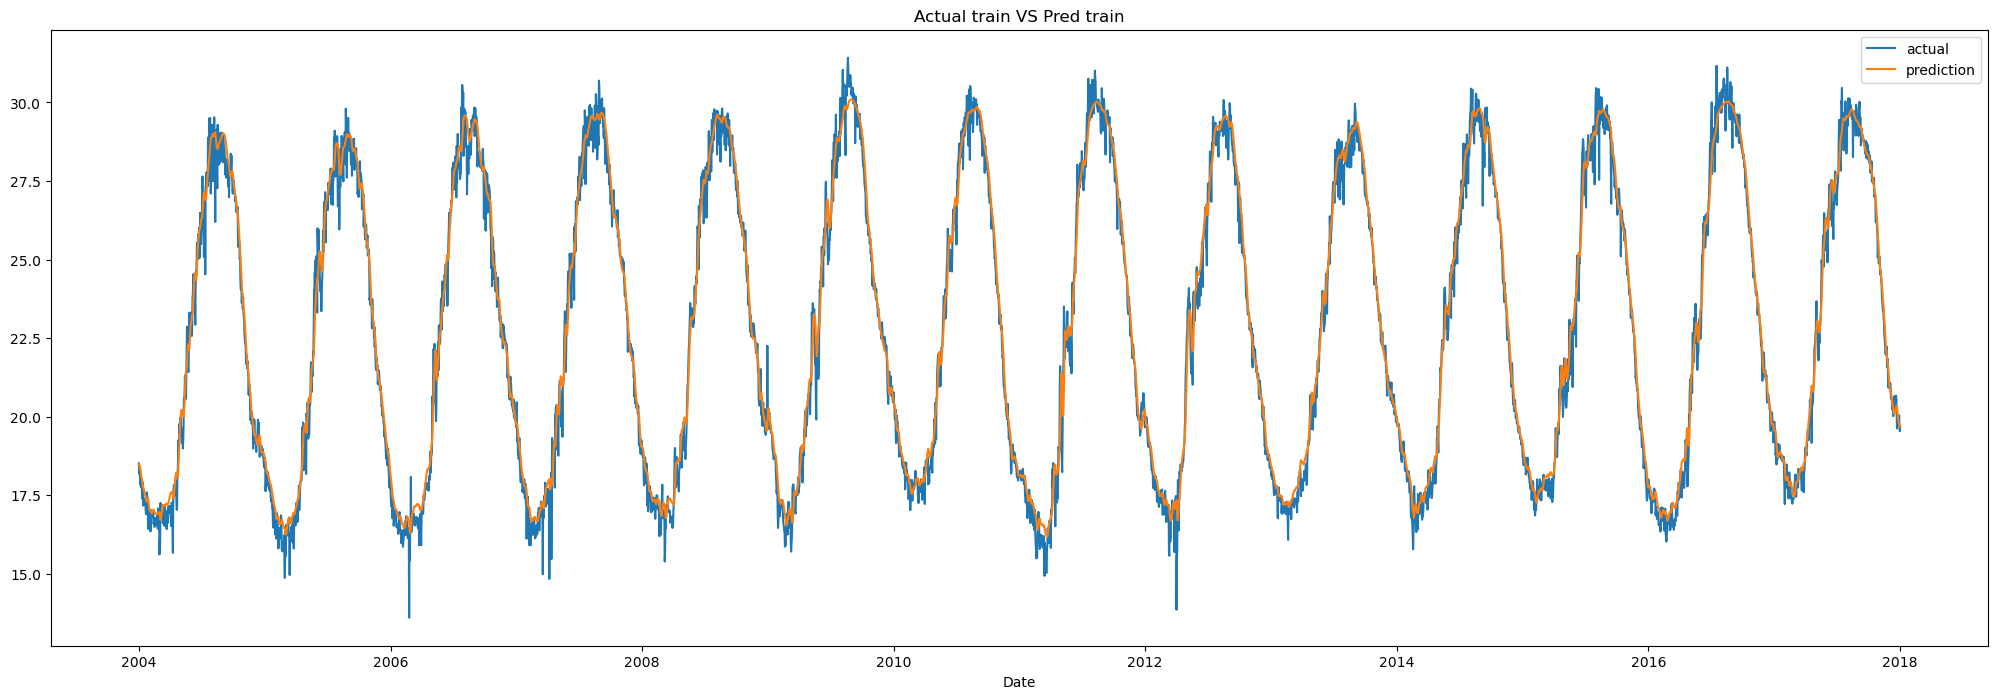

In [9]:
# Create a date range from 1 Jan 2005 to 31 Dec 2018 with 5475 days
date_range = pd.date_range(start='2004-01-01', periods=5115)

# Plotting
fig = plt.figure(figsize=(25, 8))
plt.plot(date_range, y_train, label='actual')
plt.plot(date_range, train_pred, label='prediction')
plt.legend()
plt.title("Actual train VS Pred train")
plt.xlabel("Date")
plt.show()

In [10]:
val_pred=model.predict(x_val).flatten()
val_result=pd.DataFrame(data={"actual":y_val,"pred":val_pred})
val_result

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step


,actual,pred
0,19.224512,19.622662
1,19.359100,19.536320
2,19.638175,19.449461
3,19.623615,19.406803
4,19.033638,19.398878
...,...,...
725,20.520898,20.267721
726,20.270898,20.289238
727,20.372727,20.279577
728,20.321813,20.258610


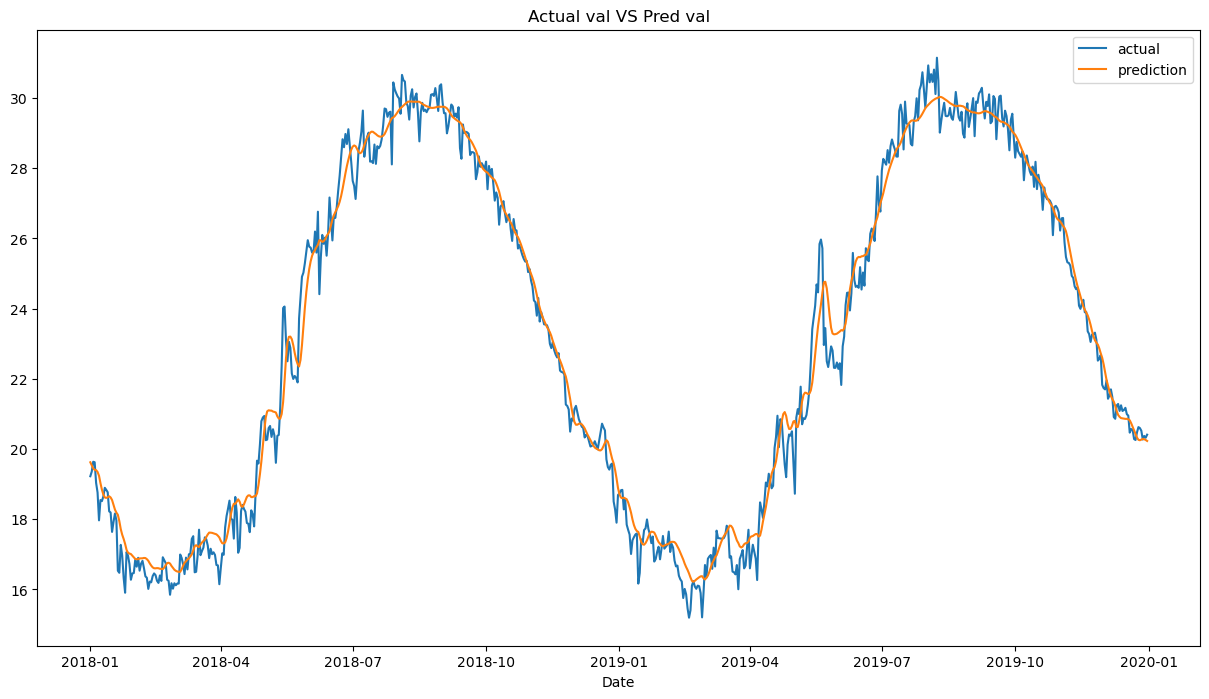

In [11]:
# Create a date range for the validation period (2018-2019)
val_date_range = pd.date_range(start='2018-01-01', periods=len(y_val))

# Plotting for validation data
fig = plt.figure(figsize=(15, 8))
plt.plot(val_date_range, y_val, label='actual')
plt.plot(val_date_range, val_pred, label='prediction')
plt.legend()
plt.title("Actual val VS Pred val")
plt.xlabel("Date")
plt.show()

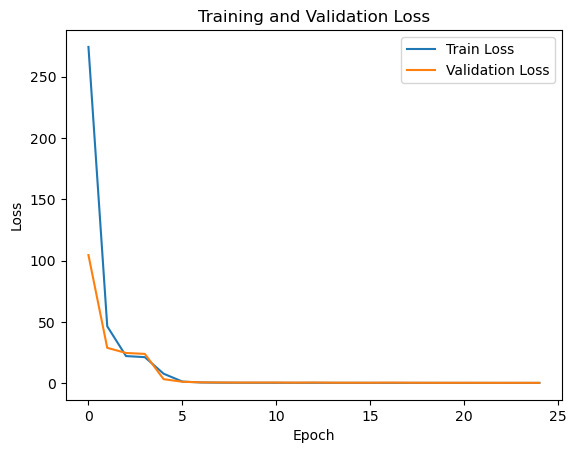

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import r2_score

test_pred=model.predict(x_test).flatten()
test_result=pd.DataFrame(data={"actual":y_test,"pred":test_pred})
r2=np.round(r2_score(y_test,test_pred),2)
print (r2)
print ("-------------------------------------")
test_result

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step
0.99
-------------------------------------


,actual,pred
0,20.236364,20.211220
1,20.306343,20.183313
2,20.188157,20.158806
3,19.895455,20.127781
4,19.859100,20.063782
...,...,...
1090,20.831800,21.059460
1091,21.115425,21.012024
1092,20.515461,20.953138
1093,20.688179,20.838840


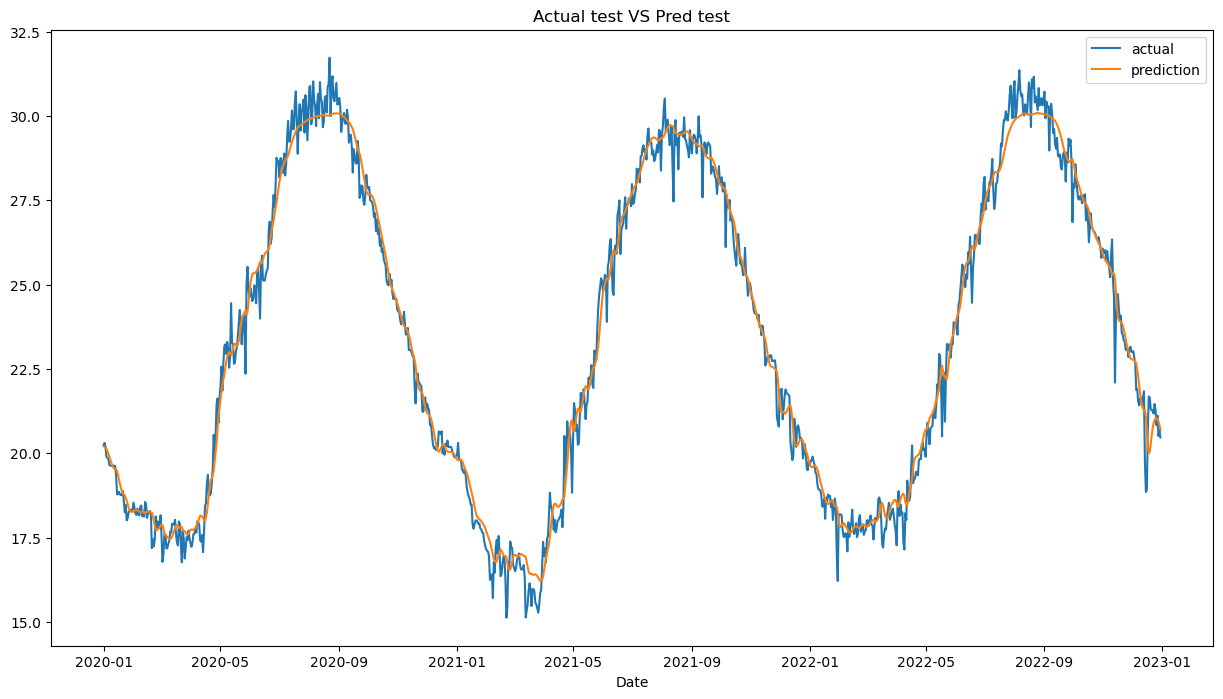

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a date range for the test period (2020-2023)
test_date_range = pd.date_range(start='2020-01-01', periods=len(y_test))

# Plotting for test data
fig = plt.figure(figsize=(15, 8))
plt.plot(test_date_range, y_test, label='actual')
plt.plot(test_date_range, test_pred, label='prediction')
plt.legend()
plt.title("Actual test VS Pred test")
plt.xlabel("Date")
plt.show()

# Test set Forecasts Plot and Evaluation Metrics

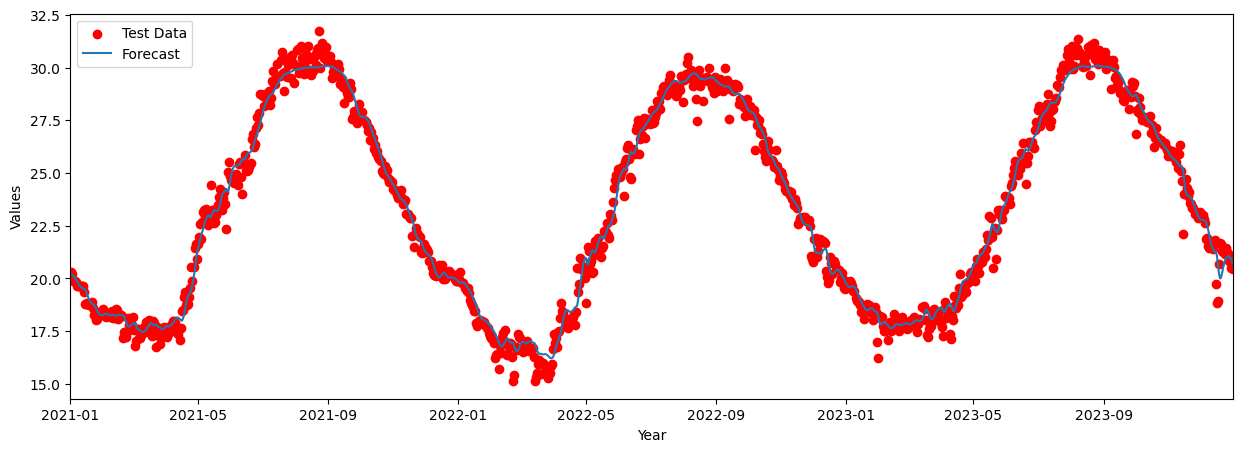

In [15]:
# Create a date range for the test period (2021-2023)
test_date_range = pd.date_range(start='2021-01-01', periods=len(y_test))

# Create a DataFrame for the test data
df_test = pd.DataFrame({'Date': test_date_range, 'Actual': y_test, 'Prediction': test_pred})
df_test.set_index('Date', inplace=True)

# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))

# Plot the test data
ax.scatter(df_test.index, df_test['Actual'], color='r', label='Test Data')

# Plot the forecasted data
ax.plot(df_test.index, df_test['Prediction'], label='Forecast')

# Set the x-axis limits to match the test data range
ax.set_xlim(df_test.index.min(), df_test.index.max())

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend(['Test Data', 'Forecast'])

plt.show()

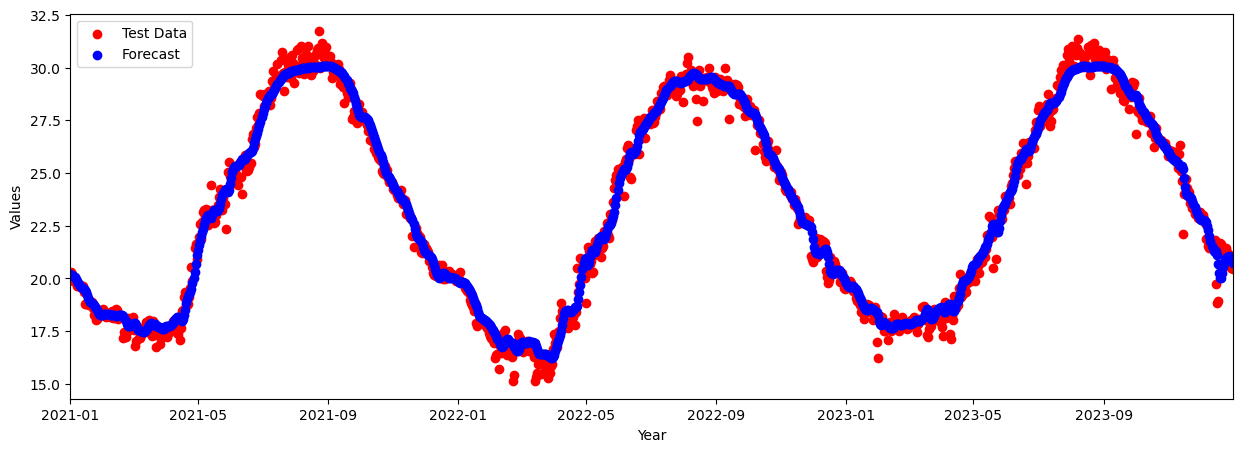

In [28]:
# Create a date range for the test period (2021-2023)
test_date_range = pd.date_range(start='2021-01-01', periods=len(y_test))

# Create a DataFrame for the test data
df_test = pd.DataFrame({'Date': test_date_range, 'Actual': y_test, 'Prediction': test_pred})
df_test.set_index('Date', inplace=True)

# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))

# Plot the test data
ax.scatter(df_test.index, df_test['Actual'], color='r', label='Test Data')

# Plot the forecasted data as blue points
ax.scatter(df_test.index, df_test['Prediction'], color='b', label='Forecast')

# Set the x-axis limits to match the test data range
ax.set_xlim(df_test.index.min(), df_test.index.max())

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend(['Test Data', 'Forecast'])

plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate metrics
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test - test_pred) / y_test)) * 100

# Print metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}%')

Mean Absolute Error: 0.41163350761138917
Mean Squared Error: 0.3084728718438685
Root Mean Squared Error: 0.5554033415850759
R-squared: 0.9857101646620687
Mean Absolute Percentage Error: 1.8399167341617246%


# Future Forecats until end of 2024

In [19]:
x_test.shape

(1095, 365, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

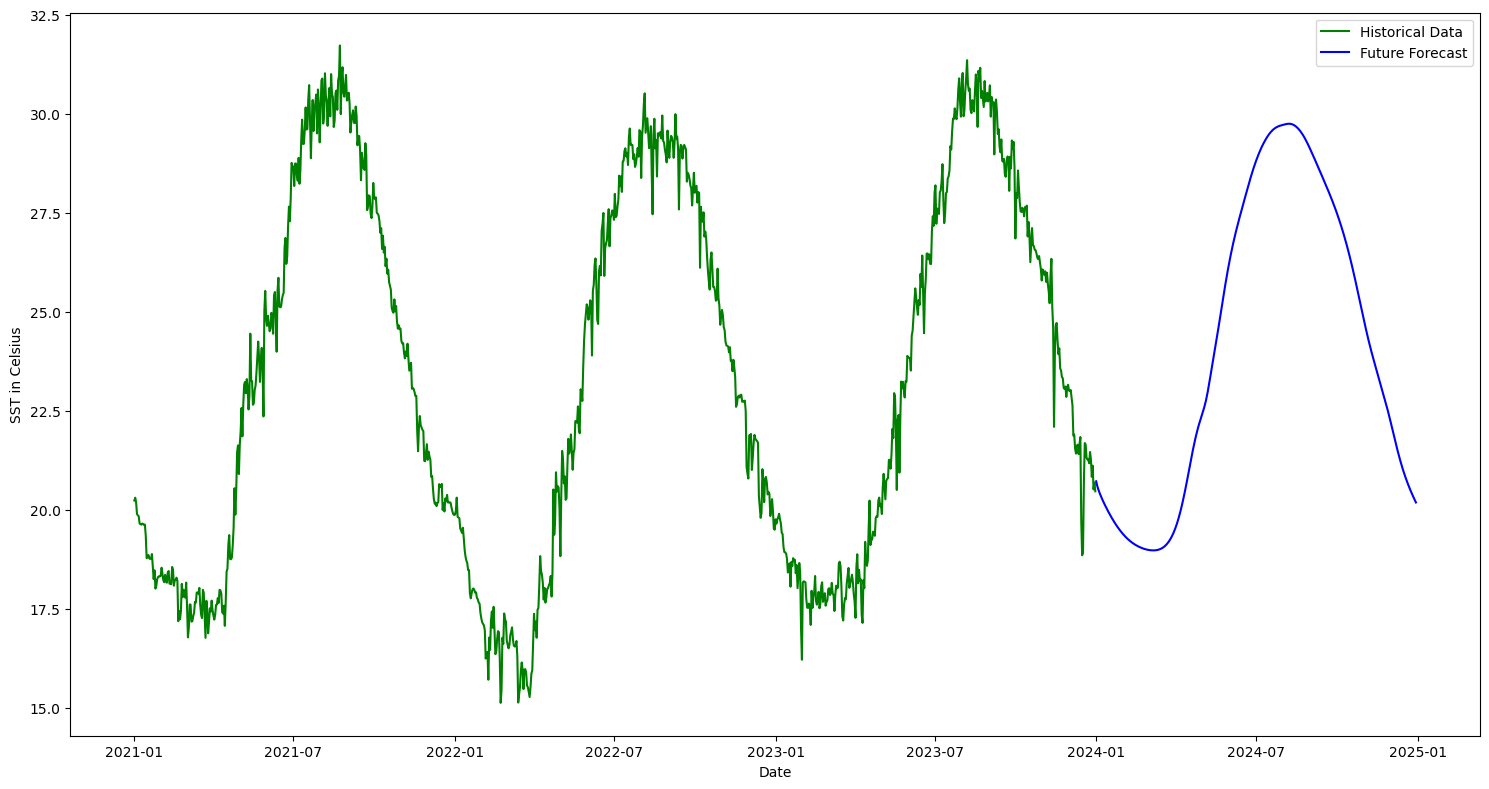

             Forecast
Date                 
2024-01-01  20.719290
2024-01-02  20.621935
2024-01-03  20.543600
2024-01-04  20.477444
2024-01-05  20.418337


In [20]:
# Use the last sequence from x_test
last_sequence = x_test[-1]  # Shape (365, 1)

# Generate future dates for 2024 (365 days)
future_dates = pd.date_range(start='2024-01-01', periods=365, freq='D')

# Create an empty list to store predictions
future_predictions = []

# Make predictions for the next 365 days
for _ in range(365):
    # Reshape the last sequence for model input (1, 365, 1)
    model_input = last_sequence.reshape((1, 365, 1))
    
    # Make a prediction
    prediction = model.predict(model_input)[0][0]
    
    # Append the prediction
    future_predictions.append(prediction)
    
    # Update the last sequence by rolling and appending the new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = prediction

# Create a DataFrame with the predictions
future_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecast': future_predictions
})
future_forecast_df.set_index('Date', inplace=True)

# Plot the results
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the historical data
historical_dates = pd.date_range(end='2023-12-31', periods=len(y_test), freq='D')
ax.plot(historical_dates, y_test, color='g', label='Historical Data')

# Plot the future forecast
ax.plot(future_forecast_df.index, future_forecast_df['Forecast'], color='b', label='Future Forecast')

ax.set_xlabel("Date")
ax.set_ylabel("SST in Celsius")
plt.legend()
plt.tight_layout()
plt.show()

# Print the first few predictions
print(future_forecast_df.head())

# Full Plots results of LSTM

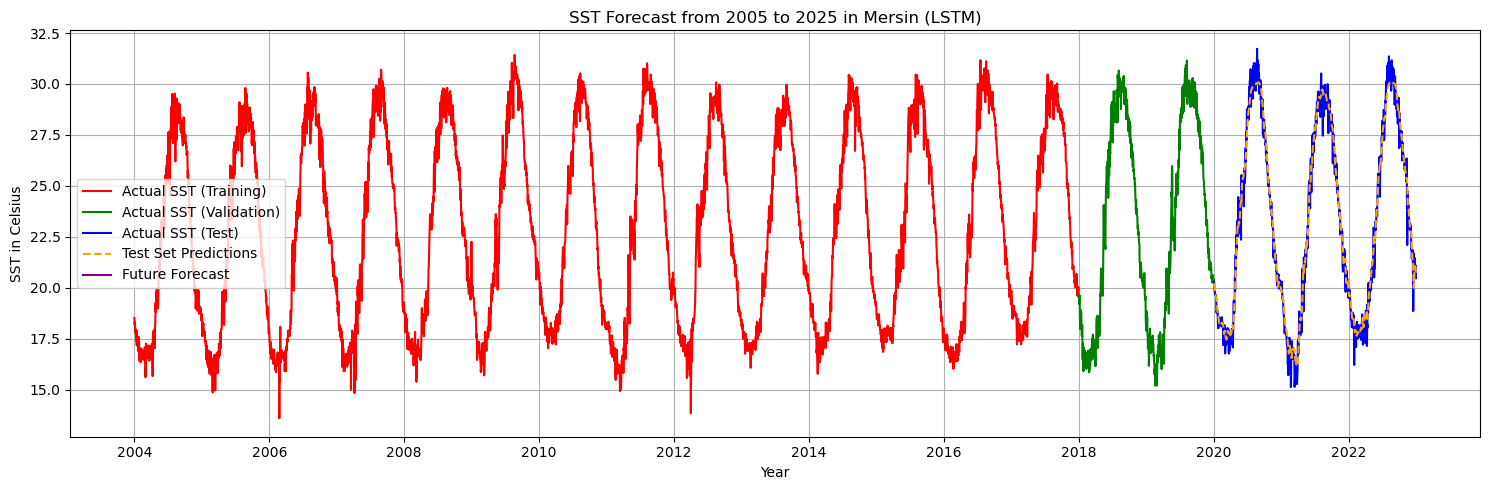

             Forecast
Date                 
2024-01-01  20.719290
2024-01-02  20.621935
2024-01-03  20.543600
2024-01-04  20.477444
2024-01-05  20.418337


In [25]:
# Generate dates for historical data based on the lengths of your data arrays
train_dates = pd.date_range(start='2004-01-01', periods=len(y_train), freq='D')
val_dates = pd.date_range(start=train_dates[-1] + pd.Timedelta(days=1), periods=len(y_val), freq='D')
test_dates = pd.date_range(start=val_dates[-1] + pd.Timedelta(days=1), periods=len(y_test), freq='D')

# Create continuous date range for the entire period including future forecasts
full_dates = pd.date_range(start=train_dates[0], periods=len(y_train) + len(y_val) + len(y_test) + len(future_forecast_df), freq='D')

# Create a DataFrame for all historical and forecast data
all_data = pd.DataFrame(index=full_dates)
all_data['Actual SST (Training)'] = pd.Series(y_train, index=train_dates)
all_data['Actual SST (Validation)'] = pd.Series(y_val, index=val_dates)
all_data['Actual SST (Test)'] = pd.Series(y_test, index=test_dates)
all_data['Test Set Predictions'] = pd.Series(test_pred, index=test_dates)
all_data['Future Forecast'] = pd.Series(future_forecast_df['Forecast'])

# Plot the results
f, ax = plt.subplots(figsize=(15, 5))

# Plot all data
ax.plot(all_data.index, all_data['Actual SST (Training)'], color='r', label='Actual SST (Training)')
ax.plot(all_data.index, all_data['Actual SST (Validation)'], color='g', label='Actual SST (Validation)')
ax.plot(all_data.index, all_data['Actual SST (Test)'], color='b', label='Actual SST (Test)')
ax.plot(all_data.index, all_data['Test Set Predictions'], color='orange', label='Test Set Predictions', linestyle='--')
ax.plot(all_data.index, all_data['Future Forecast'], color='purple', label='Future Forecast')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("SST in Celsius")
plt.title("SST Forecast from 2005 to 2025 in Mersin (LSTM)")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print the first few future predictions
print(future_forecast_df.head())

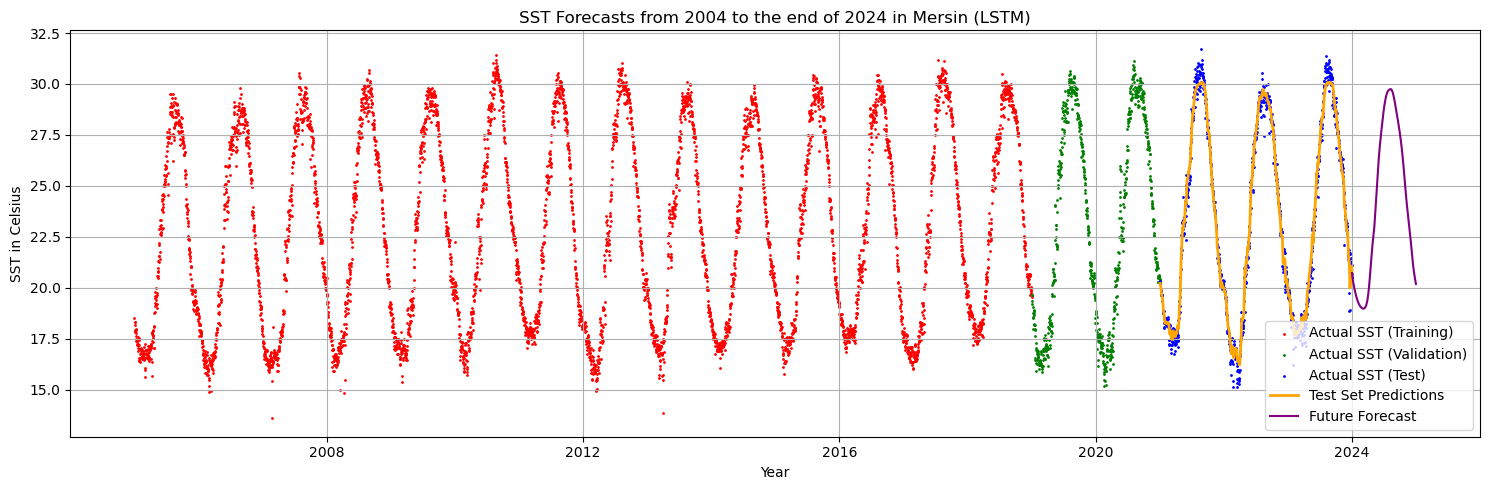

             Forecast
Date                 
2024-01-01  20.719290
2024-01-02  20.621935
2024-01-03  20.543600
2024-01-04  20.477444
2024-01-05  20.418337


In [27]:
# Generate dates for historical data based on the lengths of your data arrays
train_dates = pd.date_range(start='2005-01-01', periods=len(y_train), freq='D')
val_dates = pd.date_range(start=train_dates[-1] + pd.Timedelta(days=1), periods=len(y_val), freq='D')
test_dates = pd.date_range(start=val_dates[-1] + pd.Timedelta(days=1), periods=len(y_test), freq='D')

# Create the plot
f, ax = plt.subplots(figsize=(15, 5))

# Plot the actual values (training, validation, and test data)
ax.scatter(train_dates, y_train, color='r', label='Actual SST (Training)', s=1)
ax.scatter(val_dates, y_val, color='g', label='Actual SST (Validation)', s=1)
ax.scatter(test_dates, y_test, color='b', label='Actual SST (Test)', s=1)

# Plot the test set predictions
ax.plot(test_dates, test_pred, color='orange', label='Test Set Predictions', linewidth=2)

# Plot the future predictions
ax.plot(future_forecast_df.index, future_forecast_df['Forecast'], label='Future Forecast', color='purple')

# Customize the plot
plt.xlabel("Year")
plt.ylabel("SST in Celsius")
plt.title("SST Forecasts from 2004 to the end of 2024 in Mersin (LSTM)")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Print the first few future predictions
print(future_forecast_df.head())

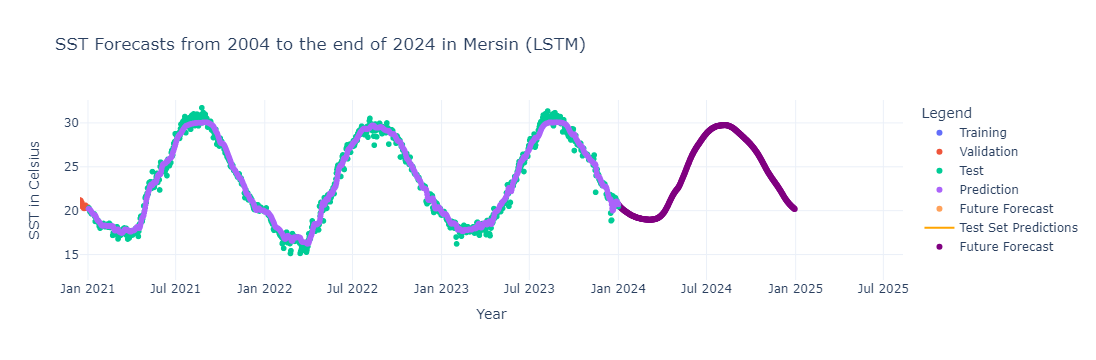

In [30]:
import plotly.express as px
# Generate dates for historical data based on the lengths of your data arrays
train_dates = pd.date_range(start='2005-01-01', periods=len(y_train), freq='D')
val_dates = pd.date_range(start=train_dates[-1] + pd.Timedelta(days=1), periods=len(y_val), freq='D')
test_dates = pd.date_range(start=val_dates[-1] + pd.Timedelta(days=1), periods=len(y_test), freq='D')

# Create DataFrames for each dataset
df_train = pd.DataFrame({'Date': train_dates, 'SST': y_train, 'Type': 'Training'})
df_val = pd.DataFrame({'Date': val_dates, 'SST': y_val, 'Type': 'Validation'})
df_test = pd.DataFrame({'Date': test_dates, 'SST': y_test, 'Type': 'Test'})
df_pred = pd.DataFrame({'Date': test_dates, 'SST': test_pred, 'Type': 'Prediction'})
df_future = future_forecast_df.copy()
df_future['Type'] = 'Future Forecast'

# Combine all DataFrames
df_all = pd.concat([df_train, df_val, df_test, df_pred, df_future])

# Plot the data using Plotly Express
fig = px.scatter(df_all, x='Date', y='SST', color='Type', title="SST Forecasts from 2004 to the end of 2024 in Mersin (LSTM)")

# Add lines for test set predictions
fig.add_scatter(x=df_pred['Date'], y=df_pred['SST'], mode='lines', name='Test Set Predictions', line=dict(color='orange'))

# Add points for future forecasts
fig.add_scatter(x=df_future.index, y=df_future['Forecast'], mode='markers', name='Future Forecast', marker=dict(color='purple'))

# Customize the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="SST in Celsius",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()

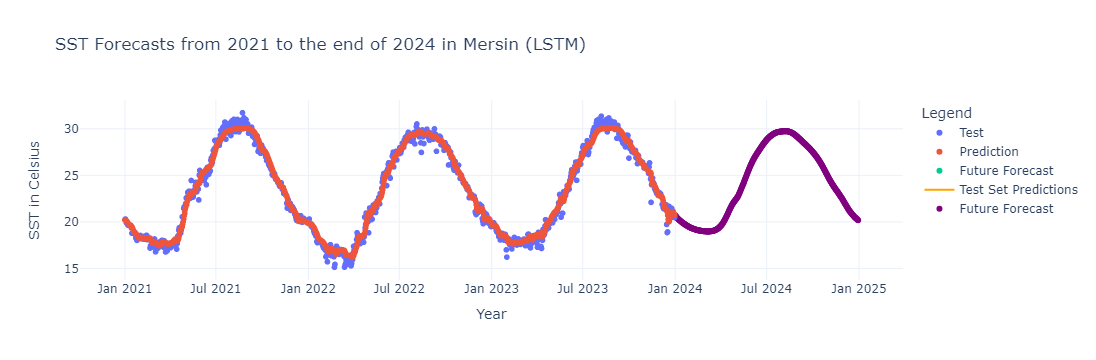

In [58]:
# Generate dates for the test set and future forecasts
test_dates = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')
future_dates = pd.date_range(start='2024-01-01', periods=len(future_forecast_df), freq='D')

# Create DataFrames for each dataset
df_test = pd.DataFrame({'Date': test_dates, 'SST': y_test, 'Type': 'Test'})
df_pred = pd.DataFrame({'Date': test_dates, 'SST': test_pred, 'Type': 'Prediction'})
df_future = future_forecast_df.copy()
df_future['Date'] = future_dates
df_future['Type'] = 'Future Forecast'

# Combine the relevant DataFrames
df_all = pd.concat([df_test, df_pred, df_future])

# Plot the data using Plotly Express
fig = px.scatter(df_all, x='Date', y='SST', color='Type', title="SST Forecasts from 2021 to the end of 2024 in Mersin (LSTM)")

# Add lines for test set predictions
fig.add_scatter(x=df_pred['Date'], y=df_pred['SST'], mode='lines', name='Test Set Predictions', line=dict(color='orange'))

# Add points for future forecasts
fig.add_scatter(x=df_future['Date'], y=df_future['Forecast'], mode='markers', name='Future Forecast', marker=dict(color='purple'))

# Customize the layout
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="SST in Celsius",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()

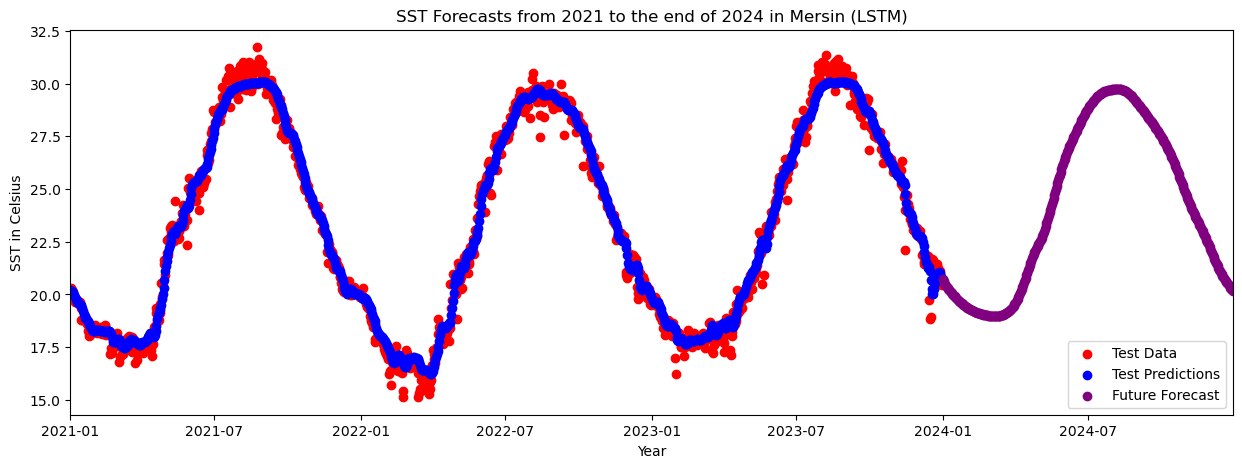

In [59]:
# Generate dates for the test set and future forecasts
test_dates = pd.date_range(start='2021-01-01', end='2023-12-31', freq='D')
future_dates = pd.date_range(start='2024-01-01', periods=len(future_forecast_df), freq='D')

# Create DataFrames for each dataset
df_test = pd.DataFrame({'Date': test_dates, 'Actual': y_test, 'Prediction': test_pred})
df_test.set_index('Date', inplace=True)

df_future = future_forecast_df.copy()
df_future['Date'] = future_dates
df_future.set_index('Date', inplace=True)

# Plot the data
f, ax = plt.subplots(figsize=(15, 5))

# Plot the test data
ax.scatter(df_test.index, df_test['Actual'], color='r', label='Test Data')

# Plot the forecasted data as blue points
ax.scatter(df_test.index, df_test['Prediction'], color='b', label='Test Predictions')

# Plot the future forecast data as purple points
ax.scatter(df_future.index, df_future['Forecast'], color='purple', label='Future Forecast')

# Set the x-axis limits to match the data range
ax.set_xlim(df_test.index.min(), df_future.index.max())

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("SST in Celsius")
plt.legend(['Test Data', 'Test Predictions', 'Future Forecast'])

plt.title("SST Forecasts from 2021 to the end of 2024 in Mersin (LSTM)")
plt.show()

# Save Results

In [31]:
df

,SST
Date,
2004-01-01,18.336373
2004-01-02,17.548176
2004-01-03,17.247261
2004-01-04,17.504519
2004-01-05,17.448189
...,...
2023-12-27,20.831800
2023-12-28,21.115425
2023-12-29,20.515461


In [46]:
df_pred

,Prediction
Date,
2021-01-01,20.211220
2021-01-02,20.183313
2021-01-03,20.158806
2021-01-04,20.127781
2021-01-05,20.063782
...,...
2023-12-27,21.059460
2023-12-28,21.012024
2023-12-29,20.953138


In [51]:
df_future

,Forecast
Date,
2024-01-01,20.719290
2024-01-02,20.621935
2024-01-03,20.543600
2024-01-04,20.477444
2024-01-05,20.418337
...,...
2024-12-26,20.378340
2024-12-27,20.328714
2024-12-28,20.280146


In [52]:
# Create the SST DataFrame
date_rng_sst = pd.date_range(start='2004-01-01', end='2023-12-31', freq='D')
df_sst = pd.DataFrame(data=df['SST'].values, index=date_rng_sst, columns=['SST'])

# Extract Prediction values from df_pred
Prediction_values = df_pred['Prediction'].values

# Create the Prediction DataFrame without the 'Type' column
df_pred = pd.DataFrame({
    'Date': pd.date_range(start='2021-01-01', end='2023-12-31', freq='D'),
    'Prediction': Prediction_values
})
df_pred.set_index('Date', inplace=True)

# Extract Future Forecast values from df_future
Future_values = df_future['Forecast'].values

# Create the Future Forecast DataFrame without the 'Type' column
df_future = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', end='2024-12-30', freq='D'),
    'Forecast': Future_values
})
df_future.set_index('Date', inplace=True)

# Concatenate the DataFrames
df_combined = pd.concat([df_sst, df_pred['Prediction'], df_future['Forecast']], axis=1)

# Display the combined DataFrame
print(df_combined)

                  SST  Prediction   Forecast
2004-01-01  18.336373         NaN        NaN
2004-01-02  17.548176         NaN        NaN
2004-01-03  17.247261         NaN        NaN
2004-01-04  17.504519         NaN        NaN
2004-01-05  17.448189         NaN        NaN
...               ...         ...        ...
2024-12-26        NaN         NaN  20.378340
2024-12-27        NaN         NaN  20.328714
2024-12-28        NaN         NaN  20.280146
2024-12-29        NaN         NaN  20.232557
2024-12-30        NaN         NaN  20.185879

[7670 rows x 3 columns]


In [53]:
df_combined.to_csv(r"C:\\results\(LSTM-365)-Mersin.csv", index=True)

# "Time Series Modelling for SST by Machine Learning"
# Abdallah I. J. Dwikat - Computer Engineering - Istanbul Aydin University
## Email: adweikat12@gmail.com 
## Linkedin: Abdallah Dwikat  www.linkedin.com/in/
abdallah-dwikat-04095927

# Note: Please cite the paper "Time Series Modelling for SST by Machine Learning, A.DWIKAT, Z.ASLAN" for any usage.